# Customer Churn Prediction

Steps of Machine learning Project

1. Understanding the problem statement
2. Data Collection
3. Data checks to perform
4. Exploratory data analysis
5. Data Preprocessing
6. Model selection and model training
7. Model evaluation and selection

# 1. Problem Statement:-

Predict which customers are likely to churn based on their past behavior.

# 2. Data Collection

Data Source:- https://www.kaggle.com/datasets/blastchar/telco-customer-churn

2.1 Import Data and Required Packages:- Numpy, Pandas, Matplotlib, Seaborn and Warnings Library.

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Load the Dataset

In [77]:
df = pd.read_csv('D:/vs_code/Customer_Churn_Prediction/data/Customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [78]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [79]:
df.shape

(7043, 21)

# 3. Data Checks to perform

1. Check Missing values
2. Check Duplicates
3. Check data type
4. Check the number of unique values of each column
5. Check statistics of data set
6. Check various categories present in the different categorical column

3.1 Check missing values

In [80]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

3.2 Check Duplicates

In [81]:
df.duplicated().sum()

np.int64(0)

3.3 Check data types

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


3.4 Checking the number of unique values of each column

In [83]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

3.5 Check statistics of the dataset

In [84]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [85]:
# Define numerical and categorical columns
numerical__columns = [feature for feature in df.columns if df[feature].dtypes != 'object']
categorical_columns = [feature for feature in df.columns if df[feature].dtypes == 'object']

print('We have {} numerical columns: {}'.format(len(numerical__columns), numerical__columns))
print('We have {} categorical columns: {}'.format(len(categorical_columns), categorical_columns))

We have 3 numerical columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges']
We have 18 categorical columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [86]:
# Checking for unique values in each categorical column

print("Categories in 'gender' variables: ",end=' ')
print(df['gender'].unique())

print("Categories in 'Partner' variables: ",end=' ')
print(df['Partner'].unique())

print("Categories in 'Dependents' variables: ",end=' ')
print(df['Dependents'].unique())

print("Categories in 'PhoneService' variables: ",end=' ')
print(df['PhoneService'].unique())

print("Categories in 'MultipleLines' variables: ",end=' ')
print(df['MultipleLines'].unique())

print("Categories in 'InternetService' variables: ",end=' ')
print(df['InternetService'].unique())

print("Categories in 'OnlineSecurity' variables: ",end=' ')
print(df['OnlineSecurity'].unique())

print("Categories in 'OnlineBackup' variables: ",end=' ')
print(df['OnlineBackup'].unique())

print("Categories in 'DeviceProtection' variables: ",end=' ')
print(df['DeviceProtection'].unique())

print("Categories in 'TechSupport' variables: ",end=' ')
print(df['TechSupport'].unique())

print("Categories in 'StreamingTV' variables: ",end=' ')
print(df['StreamingTV'].unique())

print("Categories in 'StreamingMovies' variables: ",end=' ')
print(df['StreamingMovies'].unique())

print("Categories in 'Contract' variables: ",end=' ')
print(df['Contract'].unique())

print("Categories in 'PaperlessBilling' variables: ",end=' ')
print(df['PaperlessBilling'].unique())

print("Categories in 'PaymentMethod' variables: ",end=' ')
print(df['PaymentMethod'].unique())

print("Categories in 'Churn' variables: ",end=' ')
print(df['Churn'].unique())

Categories in 'gender' variables:  ['Female' 'Male']
Categories in 'Partner' variables:  ['Yes' 'No']
Categories in 'Dependents' variables:  ['No' 'Yes']
Categories in 'PhoneService' variables:  ['No' 'Yes']
Categories in 'MultipleLines' variables:  ['No phone service' 'No' 'Yes']
Categories in 'InternetService' variables:  ['DSL' 'Fiber optic' 'No']
Categories in 'OnlineSecurity' variables:  ['No' 'Yes' 'No internet service']
Categories in 'OnlineBackup' variables:  ['Yes' 'No' 'No internet service']
Categories in 'DeviceProtection' variables:  ['No' 'Yes' 'No internet service']
Categories in 'TechSupport' variables:  ['No' 'Yes' 'No internet service']
Categories in 'StreamingTV' variables:  ['No' 'Yes' 'No internet service']
Categories in 'StreamingMovies' variables:  ['No' 'Yes' 'No internet service']
Categories in 'Contract' variables:  ['Month-to-month' 'One year' 'Two year']
Categories in 'PaperlessBilling' variables:  ['Yes' 'No']
Categories in 'PaymentMethod' variables:  ['Elec

In [87]:
# Converting 'TotalCharges' to numeric (some values might be empty strings)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# 4. EDA

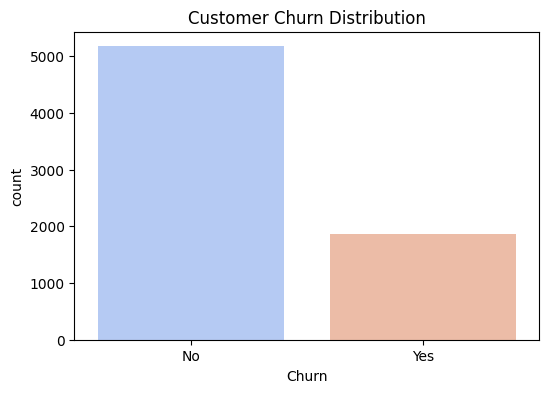

In [88]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Churn", data=df, palette="coolwarm")
plt.title("Customer Churn Distribution")
plt.show()

Insights:- This shows that the approximately 5200 customes did not churn("No) While around 1800 customer churned("Yes").

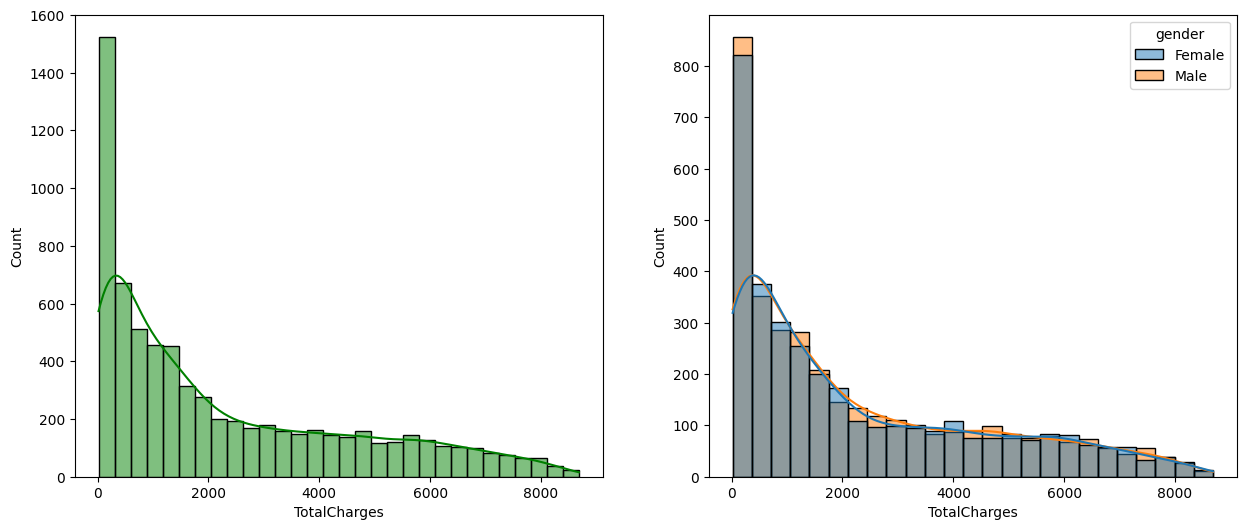

In [89]:
fig,axs = plt.subplots(1,2,figsize=(15,6))
plt.subplot(121)
sns.histplot(data=df,x='TotalCharges',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='TotalCharges',kde=True,hue='gender')
plt.show()

Insights:-

Left Histogram:- The distribution of total charges is right skiwed indicating that most individuals have lower total charges, while a smaller number have significantly higher charges

Right Histogram:- The histogram compares the distribution of total charges for females and males.Both gender shows a similar right skewed distribution, but there might be subtle difference in frequencies at different charge levels.

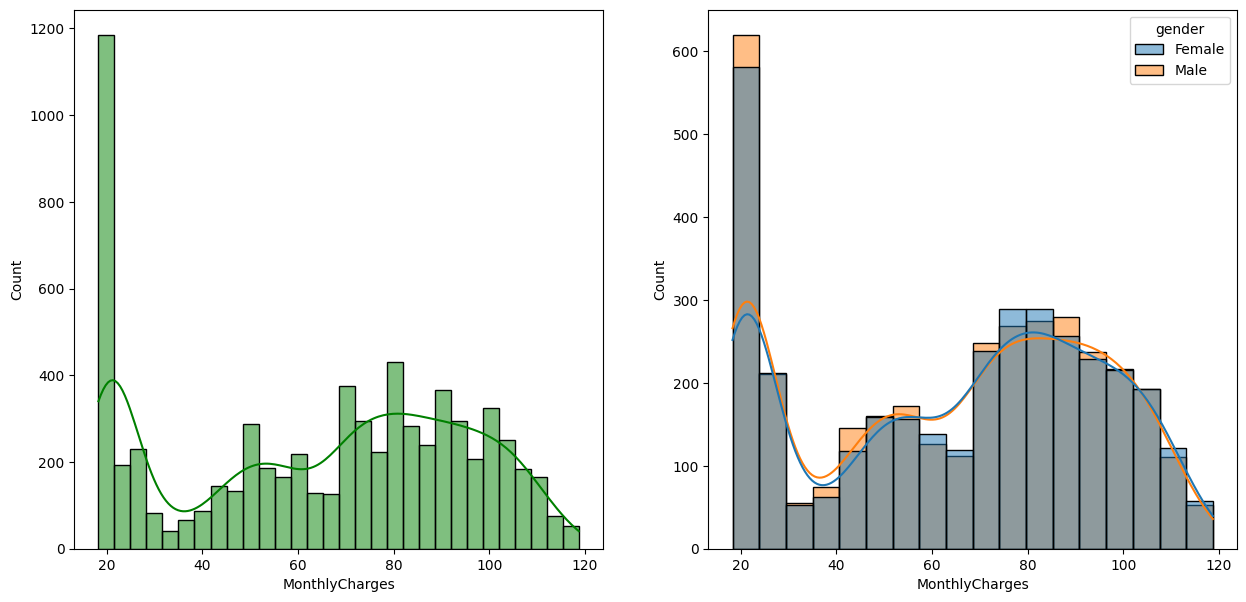

In [90]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='MonthlyCharges',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='MonthlyCharges',kde=True,hue='gender')
plt.show()

Insights:-

1. Left histogram shows the overall distribution of monthly charges, with higher count of individuals paying around 20 and another peak around 80-100.

2. Right histogram break down the monthly charges by gender, showing that both females and males have similar distributions, with higher concentration around 20 and another peak between 80 and 1000.

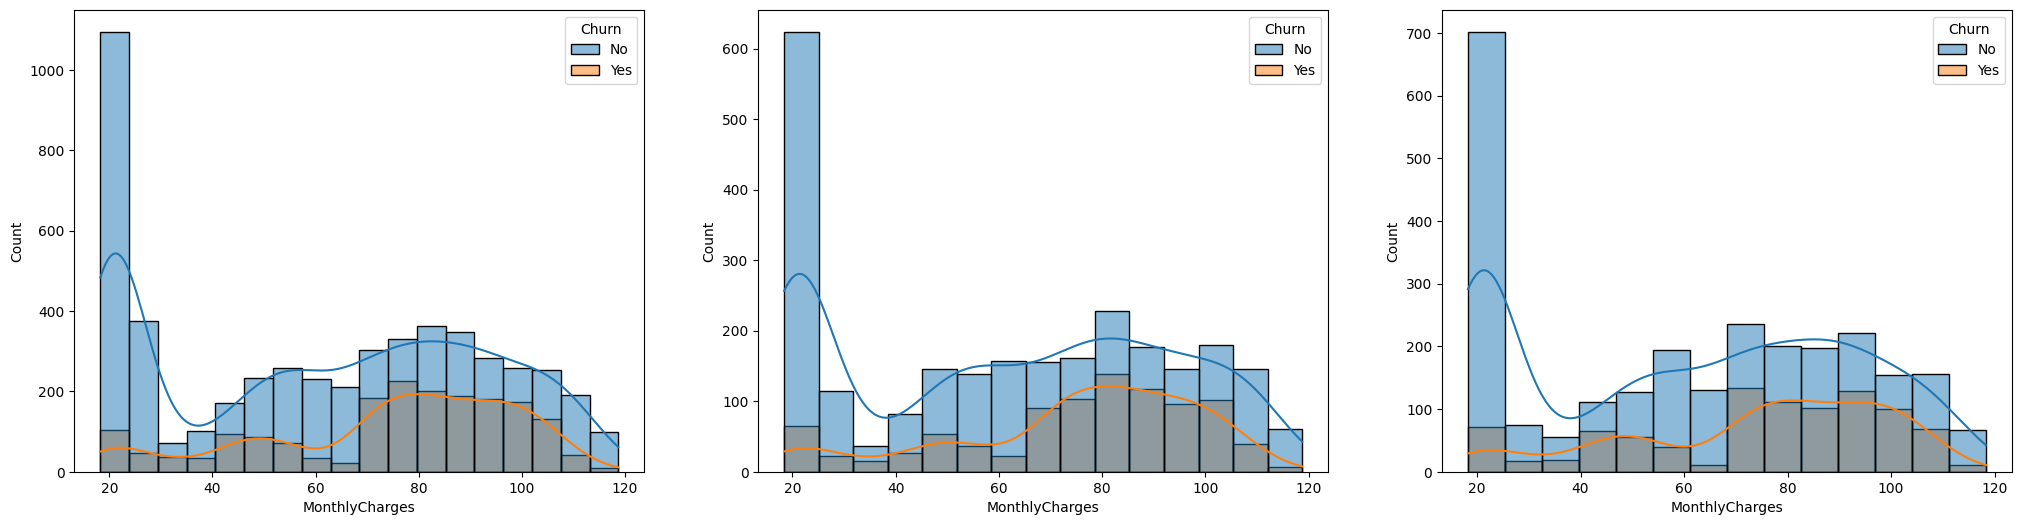

In [91]:
fig,axs = plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='MonthlyCharges',hue='Churn',kde=True)
plt.subplot(132)
sns.histplot(data=df[df.gender=='Female'],x='MonthlyCharges',hue='Churn',kde=True)
plt.subplot(133)
sns.histplot(data=df[df.gender=='Male'],x='MonthlyCharges',hue='Churn',kde=True)
plt.show()

Insights:-

Customers with higher monthly charge are more likely to churn, regardless of gender.This suggest that pricing or the value proposition for higher priced services might be an area to investigate to reduce churn.Most customers across both genders, have lower monthly charges. the distribution are generally right skewed, indicating that most customers pay less, with fewer customers paying more.

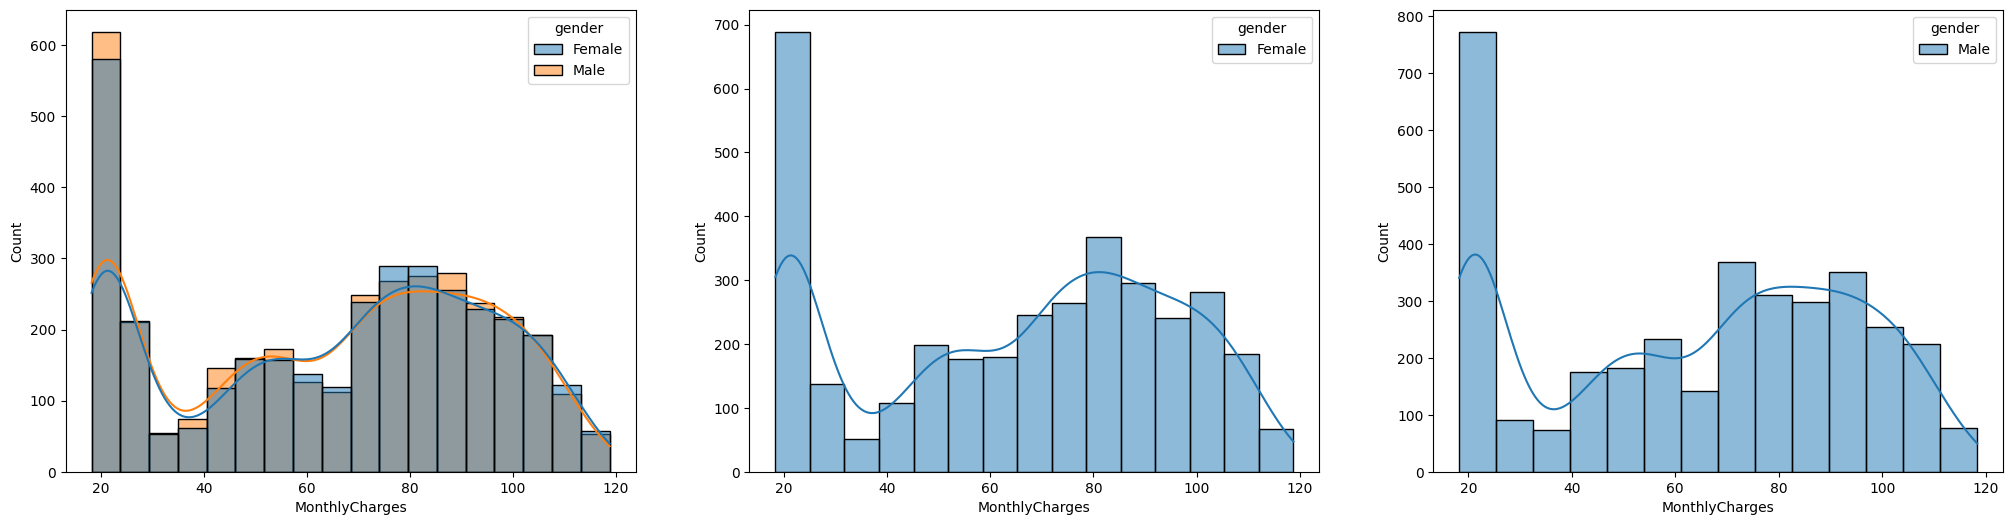

In [92]:
fig,axs = plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='MonthlyCharges',hue='gender',kde=True)
plt.subplot(132)
sns.histplot(data=df[df.gender=='Female'],x='MonthlyCharges',hue='gender',kde=True)
plt.subplot(133)
sns.histplot(data=df[df.gender=='Male'],x='MonthlyCharges',hue='gender',kde=True)
plt.show()

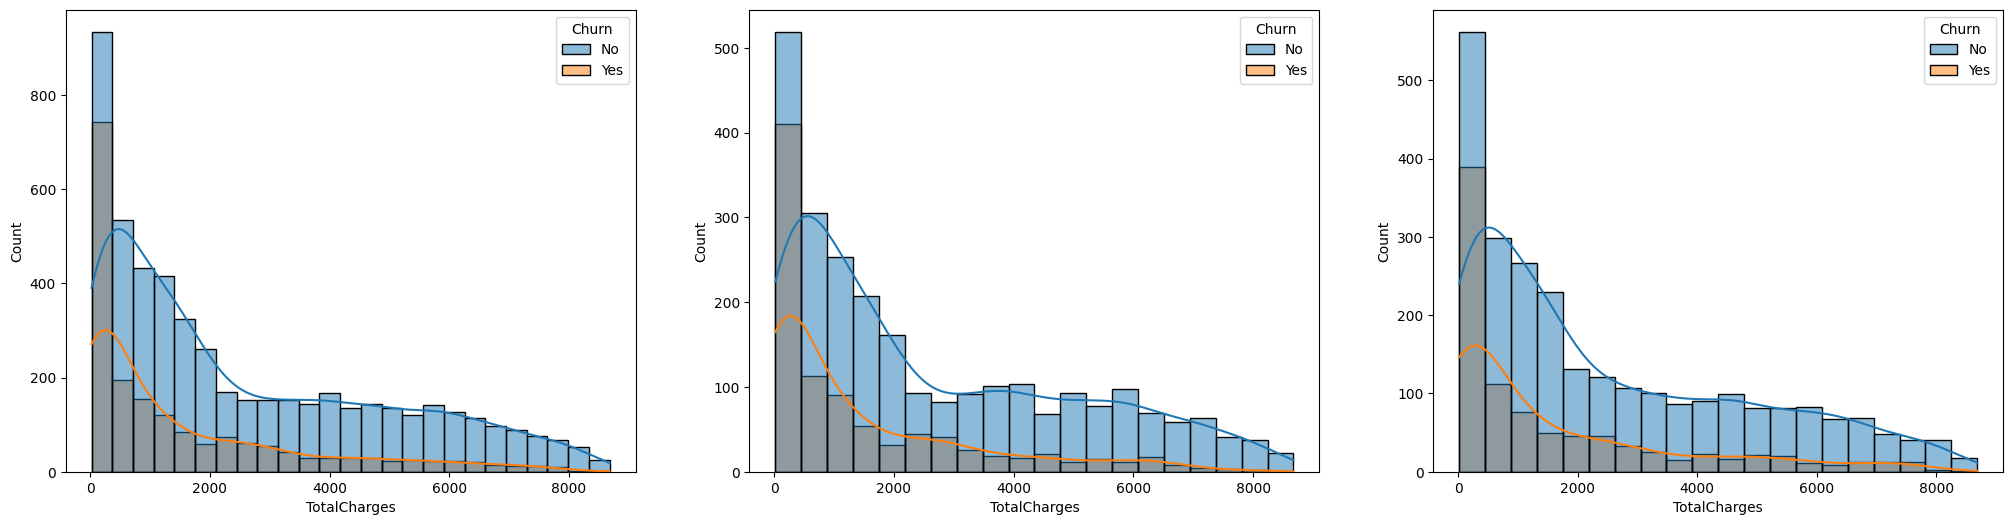

In [93]:
fig,axs = plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='TotalCharges',hue='Churn',kde=True)
plt.subplot(132)
sns.histplot(data=df[df.gender=='Female'],x='TotalCharges',hue='Churn',kde=True)
plt.subplot(133)
sns.histplot(data=df[df.gender=='Male'],x='TotalCharges',hue='Churn',kde=True)
plt.show()

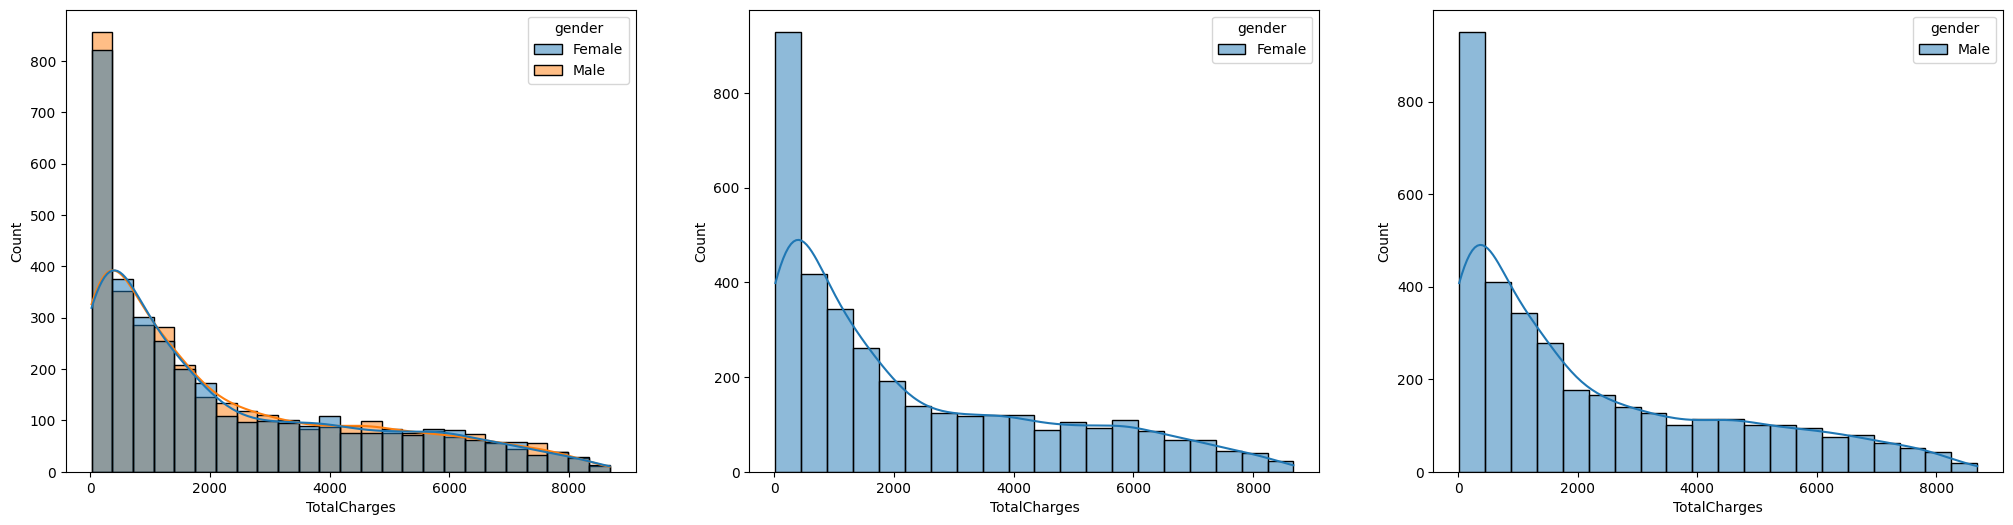

In [94]:
fig,axs = plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='TotalCharges',hue='gender',kde=True)
plt.subplot(132)
sns.histplot(data=df[df.gender=='Female'],x='TotalCharges',hue='gender',kde=True)
plt.subplot(133)
sns.histplot(data=df[df.gender=='Male'],x='TotalCharges',hue='gender',kde=True)
plt.show()

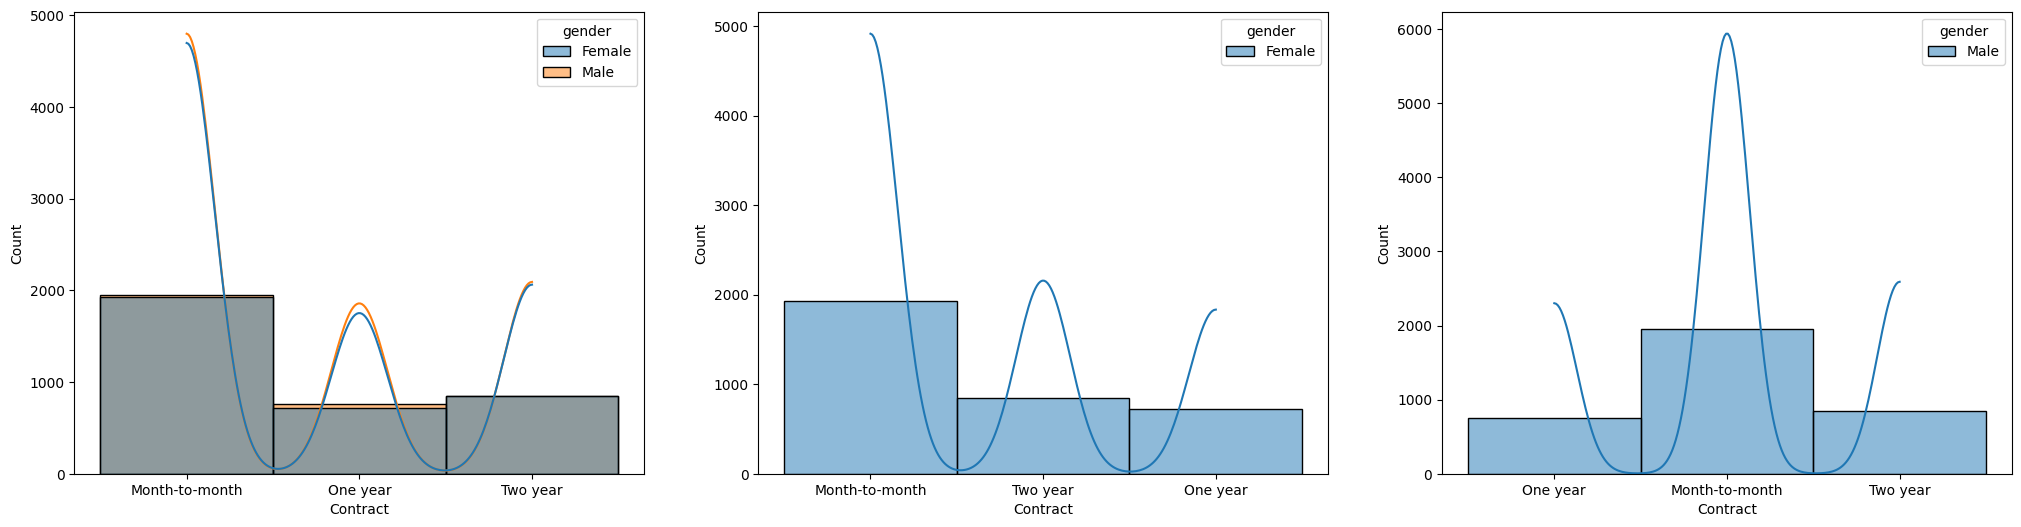

In [95]:
fig,axs = plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='Contract',hue='gender',kde=True)
plt.subplot(132)
sns.histplot(data=df[df.gender=='Female'],x='Contract',hue='gender',kde=True)
plt.subplot(133)
sns.histplot(data=df[df.gender=='Male'],x='Contract',hue='gender',kde=True)
plt.show()

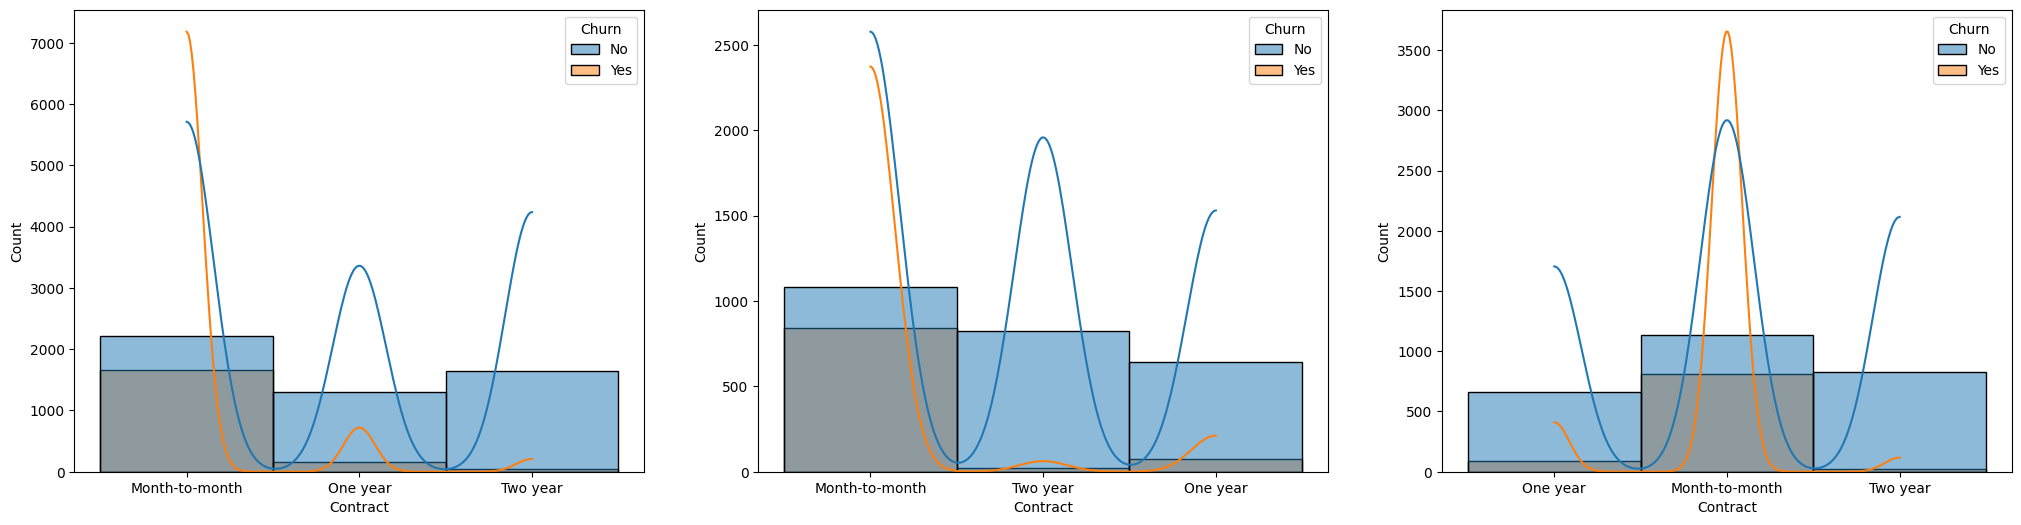

In [96]:
fig,axs = plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='Contract',hue='Churn',kde=True)
plt.subplot(132)
sns.histplot(data=df[df.gender=='Female'],x='Contract',hue='Churn',kde=True)
plt.subplot(133)
sns.histplot(data=df[df.gender=='Male'],x='Contract',hue='Churn',kde=True)
plt.show()

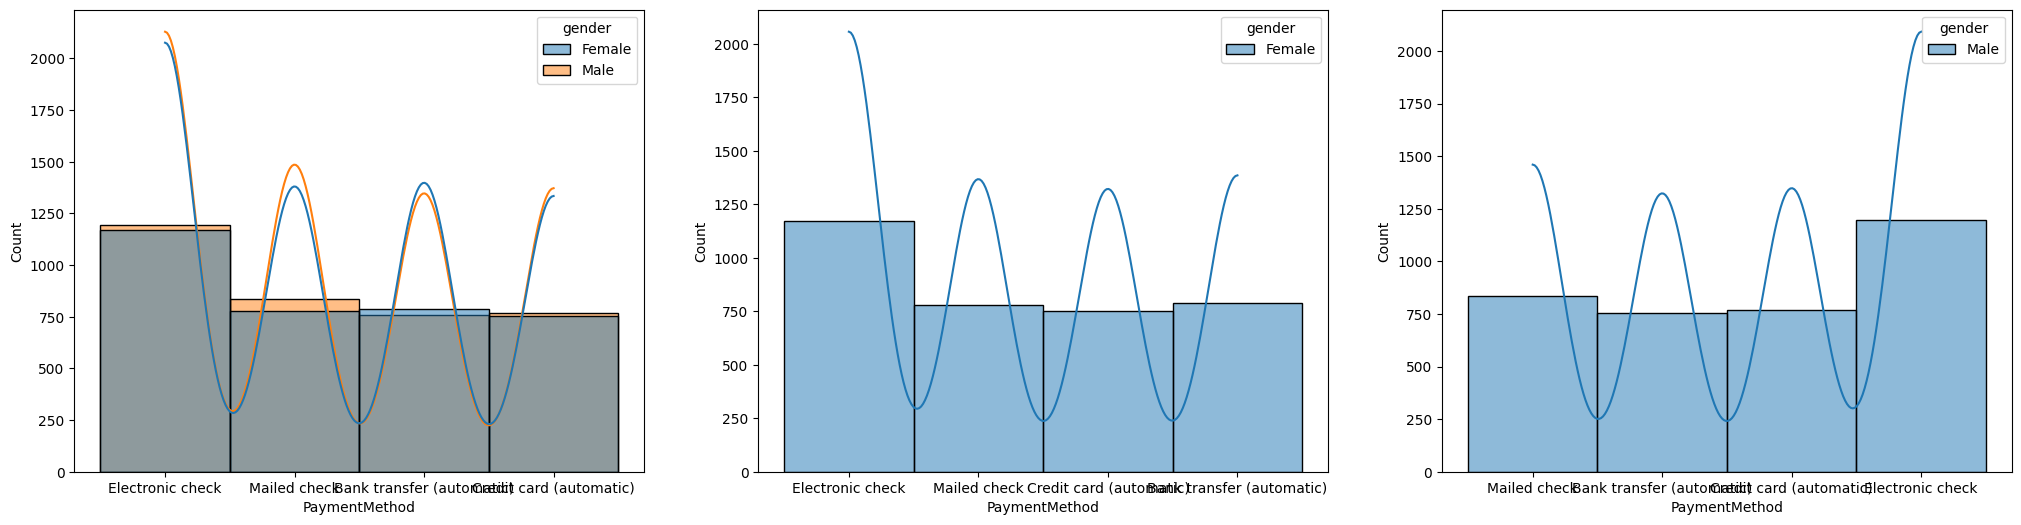

In [97]:
fig,axs = plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='PaymentMethod',hue='gender',kde=True)
plt.subplot(132)
sns.histplot(data=df[df.gender=='Female'],x='PaymentMethod',hue='gender',kde=True)
plt.subplot(133)
sns.histplot(data=df[df.gender=='Male'],x='PaymentMethod',hue='gender',kde=True)
plt.show()

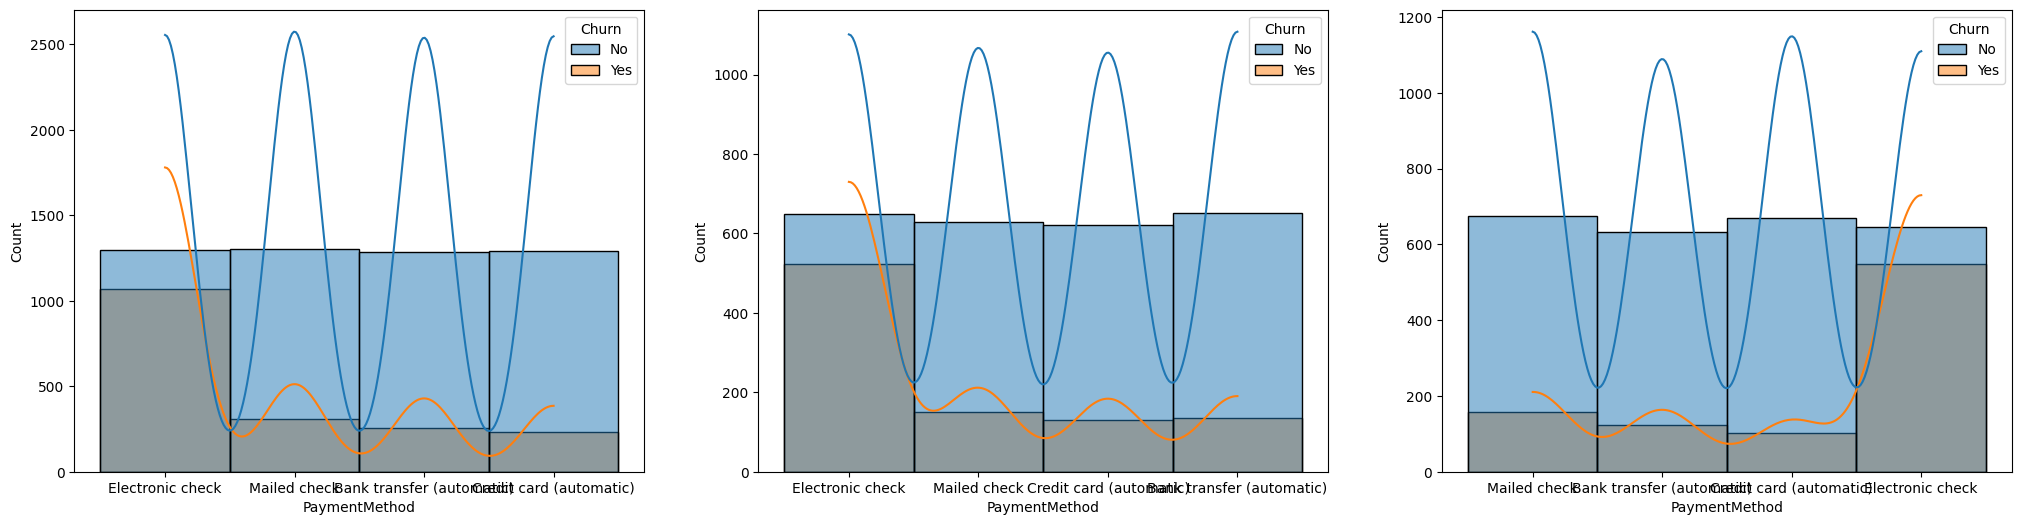

In [98]:
fig,axs = plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='PaymentMethod',hue='Churn',kde=True)
plt.subplot(132)
sns.histplot(data=df[df.gender=='Female'],x='PaymentMethod',hue='Churn',kde=True)
plt.subplot(133)
sns.histplot(data=df[df.gender=='Male'],x='PaymentMethod',hue='Churn',kde=True)
plt.show()

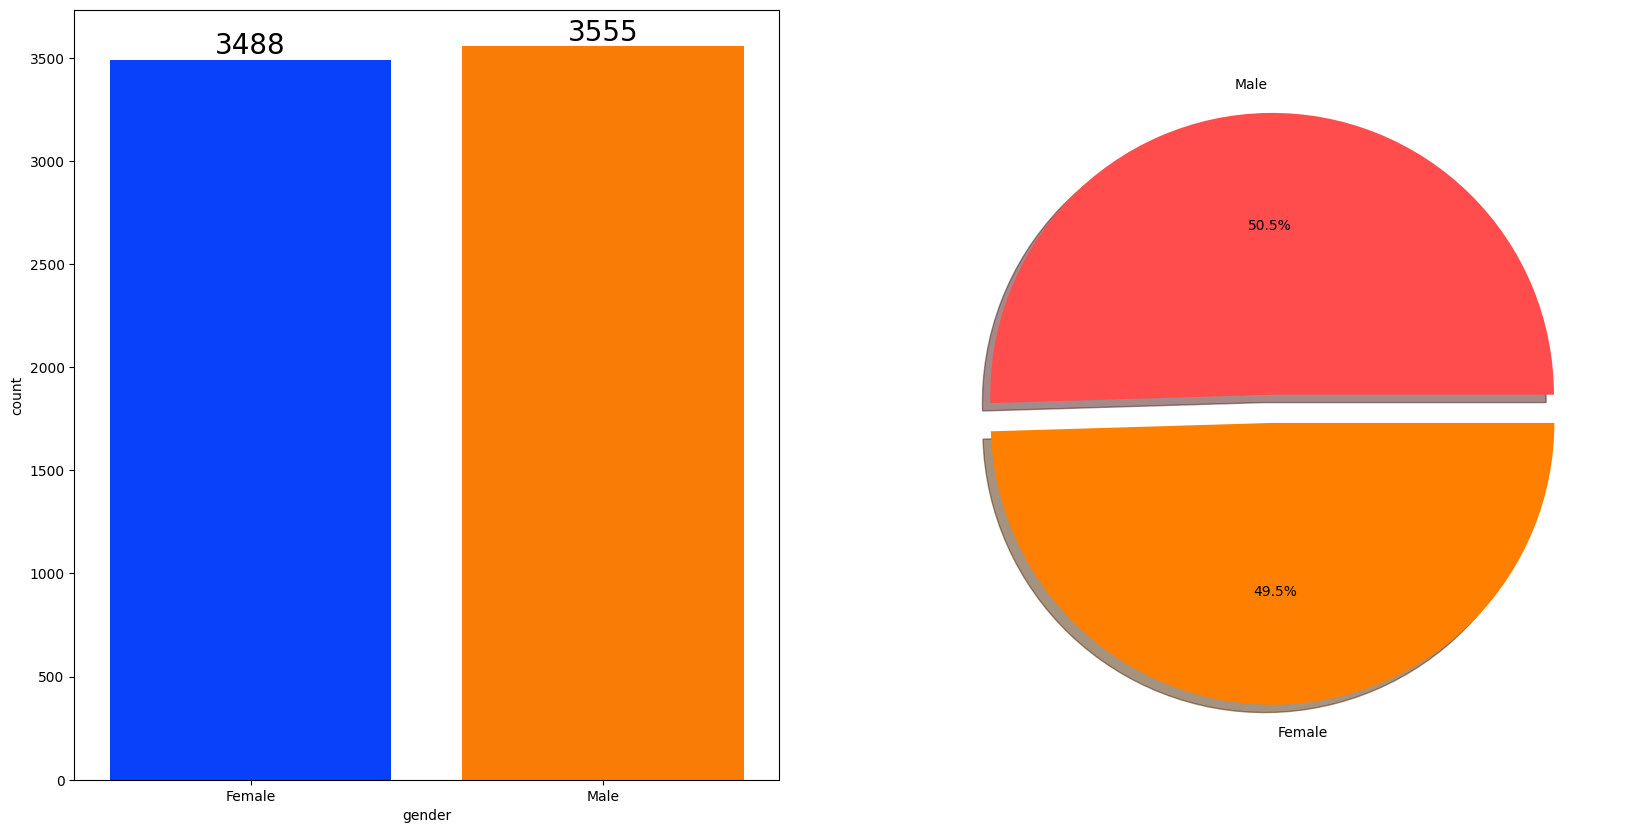

In [99]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers: # to display the count on the bar
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show() 

In [100]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['number'])

# Group by 'gender' and calculate the mean for numeric columns
gender_group = numeric_columns.groupby(df['gender']).mean()
gender_group

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
gender,,,,
Female,0.162844,32.244553,65.204243,2283.190985
Male,0.161463,32.495359,64.327482,2283.407861


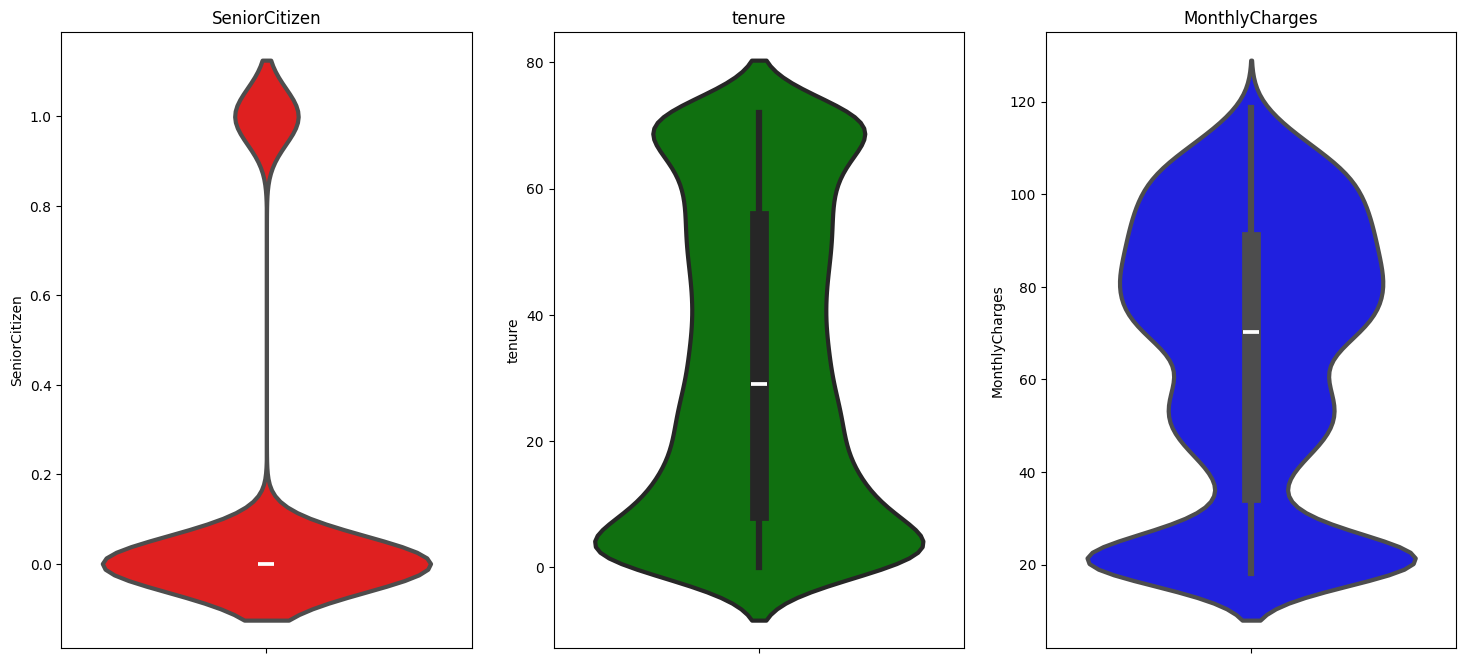

In [101]:
plt.figure(figsize=(18,8))
plt.subplot(1, 3, 1)
plt.title('SeniorCitizen')
sns.violinplot(y='SeniorCitizen',data=df,color='red',linewidth=3)
plt.subplot(1, 3, 2)
plt.title('tenure')
sns.violinplot(y='tenure',data=df,color='green',linewidth=3)
plt.subplot(1, 3, 3)
plt.title('MonthlyCharges')
sns.violinplot(y='MonthlyCharges',data=df,color='blue',linewidth=3)
plt.show()

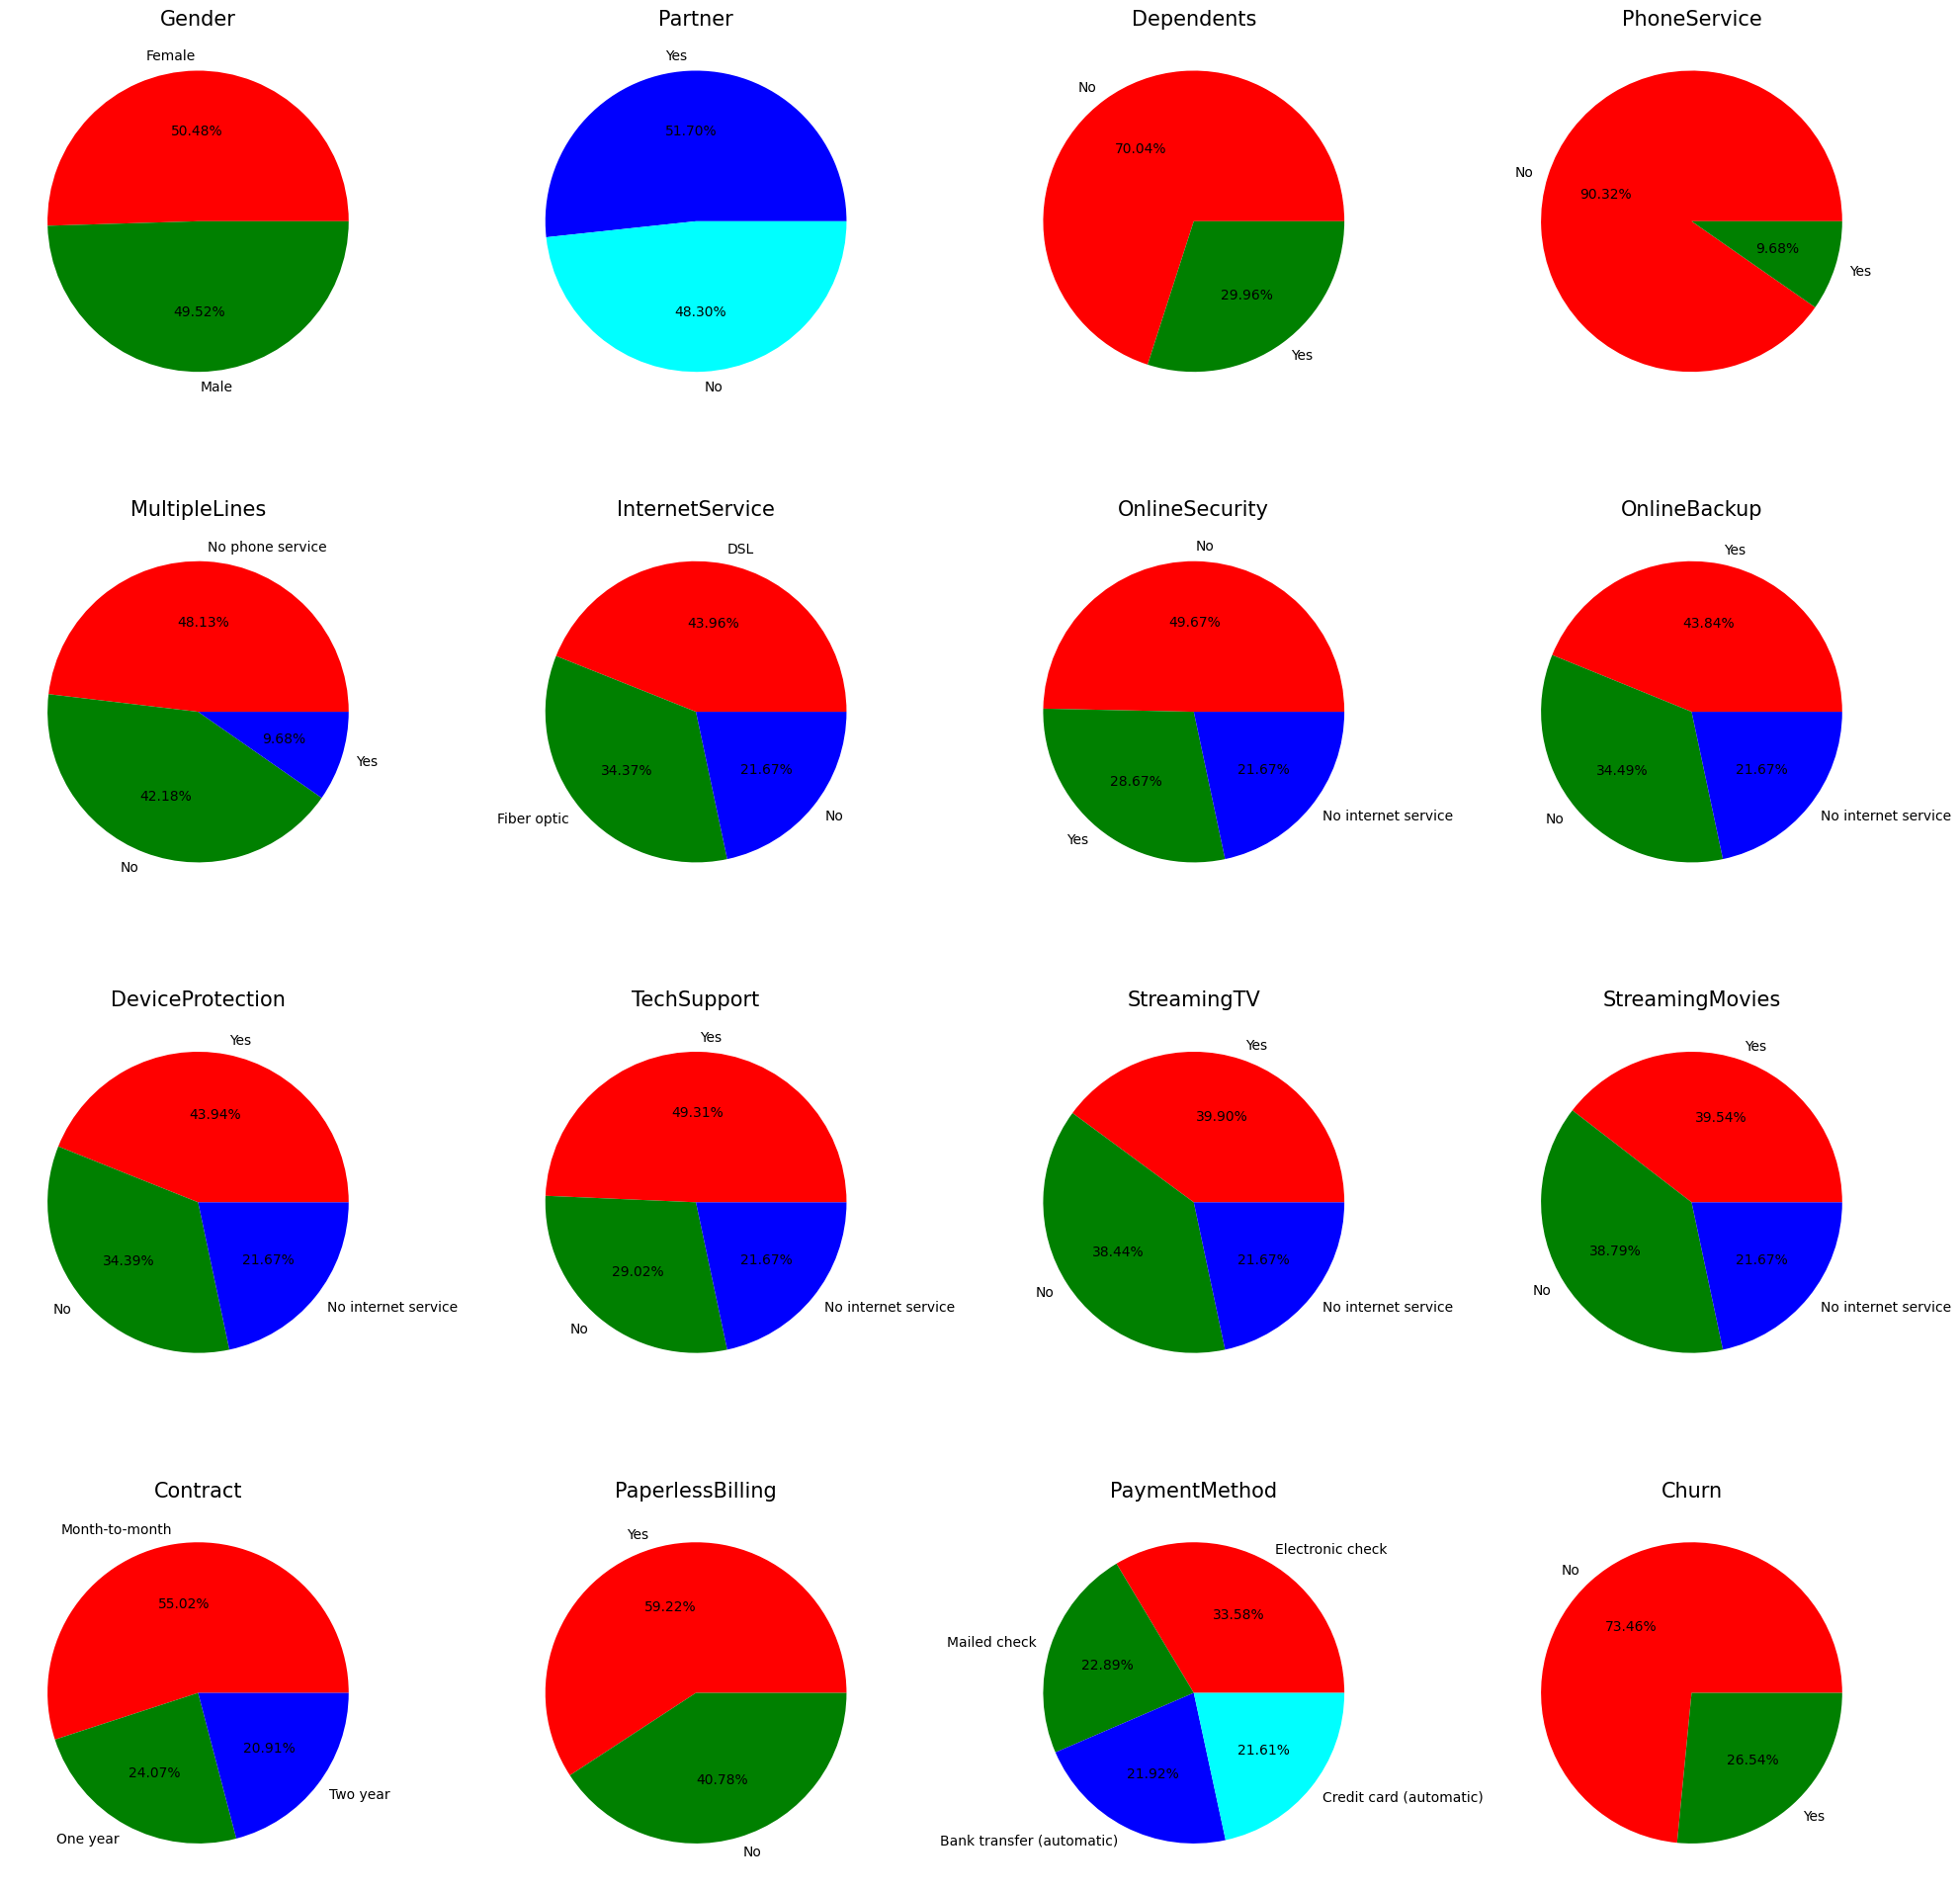

In [102]:
plt.rcParams['figure.figsize'] = (20, 20)  # Adjust figure size for better visualization

# Create a 4x4 grid layout for 16 subplots
plt.subplot(4, 4, 1)
size = df['gender'].value_counts()
labels = ['Female', 'Male']
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='%1.2f%%')
plt.title('Gender', fontsize=15)
plt.axis('off')

plt.subplot(4, 4, 2)
size = df['Partner'].value_counts()
labels = ['Yes', 'No']
color = ['blue', 'cyan']
plt.pie(size, colors=color, labels=labels, autopct='%1.2f%%')
plt.title('Partner', fontsize=15)
plt.axis('off')

plt.subplot(4, 4, 3)
size = df['Dependents'].value_counts()
labels = ['No', 'Yes']
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='%1.2f%%')
plt.title('Dependents', fontsize=15)
plt.axis('off')

plt.subplot(4, 4, 4)
size = df['PhoneService'].value_counts()
labels = ['No', 'Yes']
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='%1.2f%%')
plt.title('PhoneService', fontsize=15)
plt.axis('off')

plt.subplot(4, 4, 5)
size = df['MultipleLines'].value_counts()
labels = ['No phone service', 'No', 'Yes']
color = ['red', 'green', 'blue']
plt.pie(size, colors=color, labels=labels, autopct='%1.2f%%')
plt.title('MultipleLines', fontsize=15)
plt.axis('off')

plt.subplot(4, 4, 6)
size = df['InternetService'].value_counts()
labels = ['DSL', 'Fiber optic', 'No']
color = ['red', 'green', 'blue']
plt.pie(size, colors=color, labels=labels, autopct='%1.2f%%')
plt.title('InternetService', fontsize=15)
plt.axis('off')

plt.subplot(4, 4, 7)
size = df['OnlineSecurity'].value_counts()
labels = ['No', 'Yes', 'No internet service']
color = ['red', 'green', 'blue']
plt.pie(size, colors=color, labels=labels, autopct='%1.2f%%')
plt.title('OnlineSecurity', fontsize=15)
plt.axis('off')

plt.subplot(4, 4, 8)
size = df['OnlineBackup'].value_counts()
labels = ['Yes', 'No', 'No internet service']
color = ['red', 'green', 'blue']
plt.pie(size, colors=color, labels=labels, autopct='%1.2f%%')
plt.title('OnlineBackup', fontsize=15)
plt.axis('off')

plt.subplot(4, 4, 9)
size = df['DeviceProtection'].value_counts()
labels = ['Yes', 'No', 'No internet service']
color = ['red', 'green', 'blue']
plt.pie(size, colors=color, labels=labels, autopct='%1.2f%%')
plt.title('DeviceProtection', fontsize=15)
plt.axis('off')

plt.subplot(4, 4, 10)
size = df['TechSupport'].value_counts()
labels = ['Yes', 'No', 'No internet service']
color = ['red', 'green', 'blue']
plt.pie(size, colors=color, labels=labels, autopct='%1.2f%%')
plt.title('TechSupport', fontsize=15)
plt.axis('off')

plt.subplot(4, 4, 11)
size = df['StreamingTV'].value_counts()
labels = ['Yes', 'No', 'No internet service']
color = ['red', 'green', 'blue']
plt.pie(size, colors=color, labels=labels, autopct='%1.2f%%')
plt.title('StreamingTV', fontsize=15)
plt.axis('off')

plt.subplot(4, 4, 12)
size = df['StreamingMovies'].value_counts()
labels = ['Yes', 'No', 'No internet service']
color = ['red', 'green', 'blue']
plt.pie(size, colors=color, labels=labels, autopct='%1.2f%%')
plt.title('StreamingMovies', fontsize=15)
plt.axis('off')

plt.subplot(4, 4, 13)
size = df['Contract'].value_counts()
labels = ['Month-to-month', 'One year', 'Two year']
color = ['red', 'green', 'blue']
plt.pie(size, colors=color, labels=labels, autopct='%1.2f%%')
plt.title('Contract', fontsize=15)
plt.axis('off')

plt.subplot(4, 4, 14)
size = df['PaperlessBilling'].value_counts()
labels = ['Yes', 'No']
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='%1.2f%%')
plt.title('PaperlessBilling', fontsize=15)
plt.axis('off')

plt.subplot(4, 4, 15)
size = df['PaymentMethod'].value_counts()
labels = ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
color = ['red', 'green', 'blue', 'cyan']
plt.pie(size, colors=color, labels=labels, autopct='%1.2f%%')
plt.title('PaymentMethod', fontsize=15)
plt.axis('off')

plt.subplot(4, 4, 16)
size = df['Churn'].value_counts()
labels = ['No', 'Yes']
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='%1.2f%%')
plt.title('Churn', fontsize=15)
plt.axis('off')

plt.tight_layout()
plt.show()

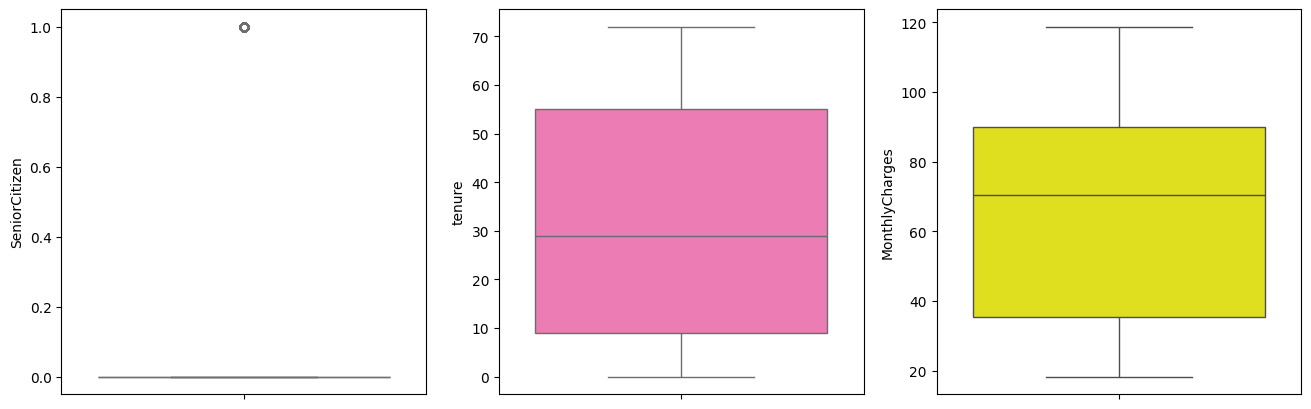

In [104]:
plt.subplots(1,3,figsize=(16,5))
plt.subplot(131)
sns.boxplot(df['SeniorCitizen'],color='skyblue')
plt.subplot(132)
sns.boxplot(df['tenure'],color='hotpink')
plt.subplot(133)
sns.boxplot(df['MonthlyCharges'],color='yellow')
plt.show()

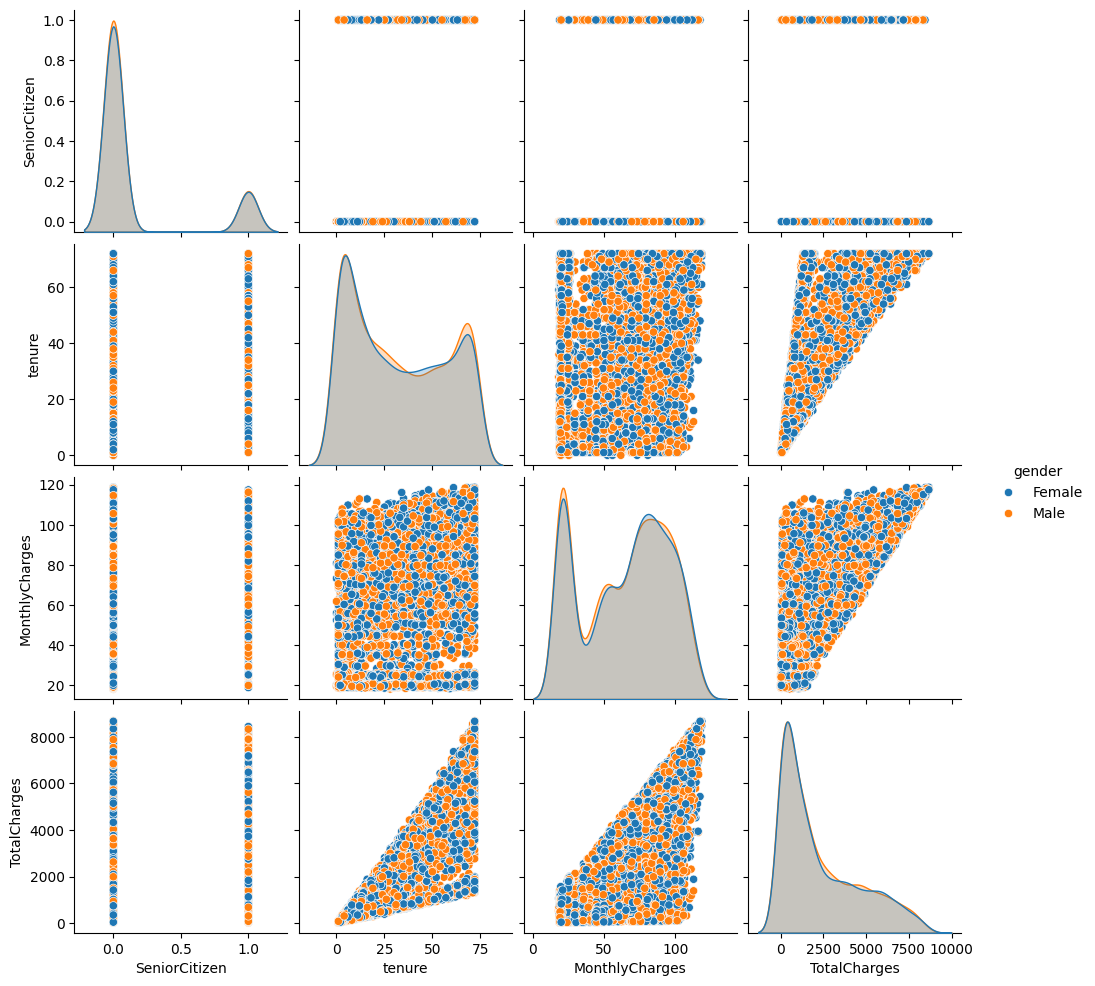

In [105]:
sns.pairplot(df,hue = 'gender')
plt.show()

# 5. Conclusion

Feature Relationships:
The pairplot will reveal how numerical features in the dataset relate to each other (e.g., linear or non-linear relationships).

Gender-Based Patterns:
By using hue='gender', the plot will highlight any differences in feature distributions or relationships based on gender.

Outliers:
The pairplot may help identify outliers in the dataset.

Correlation:
Strong correlations between features can be visually identified, which might indicate redundancy or multicollinearity.

Data Distribution:
The diagonal plots (histograms or KDE plots) will show the distribution of individual features, segmented by gender.